<a href="https://colab.research.google.com/github/Prashil-14-Stack/ML/blob/main/AdSalesPred_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd

In [69]:
from google.colab import files
uploaded=files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset (1).csv


In [70]:
df=pd.read_csv("DigitalAd_dataset.csv")

In [71]:
df.head(10)

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1
5,48,29000,1
6,45,22000,1
7,47,49000,1
8,48,41000,1
9,45,22000,1


In [72]:
df.size

1200

In [73]:
df.shape

(400, 3)

In [74]:
df.shape[1]

3

In [75]:
df.shape[0]

400

In [76]:
p=range(len(df))

In [77]:
print(p)

range(0, 400)


In [78]:
print(len(df))

400


In [79]:
X=df.iloc[:,:-1]

In [80]:
X.head(5)

,Age,Salary
0,18,82000
1,29,80000
2,47,25000
3,45,26000
4,46,28000


In [81]:
Y=df.iloc[:,-1]

In [82]:
Y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: Status, dtype: int64

In [83]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
X=MM.fit_transform(X)



In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0) 

In [85]:
X_train

array([[0.71428571, 0.55555556],
       [0.0952381 , 0.08888889],
       [0.54761905, 0.42222222],
       [0.38095238, 0.20740741],
       [0.5952381 , 0.71851852],
       [0.42857143, 0.62222222],
       [0.4047619 , 0.21481481],
       [0.57142857, 0.47407407],
       [0.4047619 , 0.41481481],
       [0.47619048, 0.25925926],
       [0.5       , 0.41481481],
       [0.35714286, 0.99259259],
       [0.57142857, 0.40740741],
       [0.4047619 , 0.08888889],
       [0.95238095, 0.05925926],
       [0.4047619 , 0.97777778],
       [0.5       , 0.67407407],
       [0.33333333, 0.77777778],
       [0.71428571, 0.88148148],
       [0.54761905, 0.42222222],
       [0.19047619, 0.14814815],
       [0.45238095, 0.48148148],
       [0.54761905, 0.27407407],
       [0.4047619 , 0.25925926],
       [0.69047619, 0.05925926],
       [0.66666667, 0.32592593],
       [0.35714286, 0.0962963 ],
       [0.52380952, 0.44444444],
       [0.57142857, 0.65925926],
       [0.33333333, 0.75555556],
       [0.

In [86]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
age=int(input("enter the Age: "))
Salary=int(input("enter the Salary: "))
output=[[age,Salary]]
result = model.predict(MM.transform(output))
if result==1:
  print("Customer is likely to buy the product") 
else:
  print("Customer is not likely to buy the product")

enter the Age: 25
enter the Salary: 1000000
Customer is likely to buy the product


In [88]:
y_pred=model.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score
Cm=confusion_matrix(y_test,y_pred)
print(Cm)

[[61  0]
 [21 18]]


In [90]:
from sklearn.metrics import roc_auc_score, roc_curve

In [91]:
import matplotlib.pyplot as plt
nsprobab=[0 for _ in range(len(y_test))] #Straight diadonal line 
lsprobab=model.predict_proba(X_test)

In [92]:
lsprobab

array([[0.82935579, 0.17064421],
       [0.63655307, 0.36344693],
       [0.29044285, 0.70955715],
       [0.30644693, 0.69355307],
       [0.74346812, 0.25653188],
       [0.93325333, 0.06674667],
       [0.91491508, 0.08508492],
       [0.20014932, 0.79985068],
       [0.94345738, 0.05654262],
       [0.64508198, 0.35491802],
       [0.97572657, 0.02427343],
       [0.88924423, 0.11075577],
       [0.95394351, 0.04605649],
       [0.56396735, 0.43603265],
       [0.61963162, 0.38036838],
       [0.63209854, 0.36790146],
       [0.25781856, 0.74218144],
       [0.7538336 , 0.2461664 ],
       [0.57843975, 0.42156025],
       [0.81161597, 0.18838403],
       [0.8978923 , 0.1021077 ],
       [0.72746021, 0.27253979],
       [0.90369413, 0.09630587],
       [0.64984489, 0.35015511],
       [0.9428037 , 0.0571963 ],
       [0.57603632, 0.42396368],
       [0.96724745, 0.03275255],
       [0.94002371, 0.05997629],
       [0.32118417, 0.67881583],
       [0.75134655, 0.24865345],
       [0.

In [93]:
lsprobab=lsprobab[:,1] #We have bifurcated this into only those probablities where the cutsomer is going to buy a product 

In [94]:
lsprobab

array([0.17064421, 0.36344693, 0.70955715, 0.69355307, 0.25653188,
       0.06674667, 0.08508492, 0.79985068, 0.05654262, 0.35491802,
       0.02427343, 0.11075577, 0.04605649, 0.43603265, 0.38036838,
       0.36790146, 0.74218144, 0.2461664 , 0.42156025, 0.18838403,
       0.1021077 , 0.27253979, 0.09630587, 0.35015511, 0.0571963 ,
       0.42396368, 0.03275255, 0.05997629, 0.67881583, 0.24865345,
       0.16149076, 0.17899879, 0.35266638, 0.9143893 , 0.03410076,
       0.07834927, 0.01696394, 0.11469564, 0.04577872, 0.06674667,
       0.44962443, 0.95074478, 0.25541826, 0.1562271 , 0.44747759,
       0.05516954, 0.356371  , 0.3042741 , 0.22510172, 0.91582862,
       0.61021001, 0.04425725, 0.51292795, 0.14800395, 0.18521429,
       0.37397713, 0.02846028, 0.28193777, 0.03806849, 0.36078796,
       0.11833882, 0.24072476, 0.30353192, 0.30012046, 0.42070499,
       0.72691786, 0.45107183, 0.35863319, 0.4334912 , 0.82449824,
       0.43090833, 0.59477688, 0.03353361, 0.15364812, 0.28089

In [95]:
X_test

array([[0.21428571, 0.6       ],
       [0.71428571, 0.11111111],
       [1.        , 0.14074074],
       [0.71428571, 0.6       ],
       [0.4047619 , 0.45925926],
       [0.33333333, 0.02222222],
       [0.26190476, 0.23703704],
       [0.92857143, 0.43703704],
       [0.30952381, 0.        ],
       [0.52380952, 0.42222222],
       [0.        , 0.21481481],
       [0.26190476, 0.34074074],
       [0.19047619, 0.12592593],
       [0.69047619, 0.25925926],
       [0.73809524, 0.0962963 ],
       [0.35714286, 0.72592593],
       [0.69047619, 0.72592593],
       [0.52380952, 0.23703704],
       [0.54761905, 0.48148148],
       [0.4047619 , 0.31851852],
       [0.14285714, 0.51111111],
       [0.45238095, 0.40740741],
       [0.23809524, 0.32592593],
       [0.52380952, 0.41481481],
       [0.23809524, 0.12592593],
       [0.57142857, 0.44444444],
       [0.19047619, 0.        ],
       [0.30952381, 0.02222222],
       [0.95238095, 0.17037037],
       [0.4047619 , 0.44444444],
       [0.

In [96]:
nsAUC=roc_auc_score(y_test,nsprobab)
lrAUC=roc_auc_score(y_test,lsprobab)

In [97]:
print(nsAUC*100)


50.0


In [98]:
print(lrAUC*100)

92.64396805380412


In [99]:
nsFP,nsTP,_=roc_curve(y_test,nsprobab)
lsFP,lsTP,_=roc_curve(y_test,lsprobab)

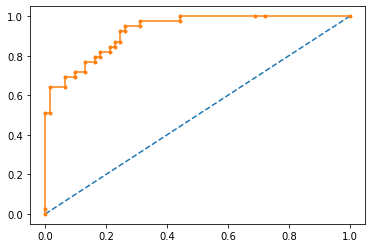

In [100]:
plt.plot(nsFP,nsTP,linestyle='--',label='ns')
plt.plot(lsFP,lsTP,marker='.',label='Logistics')

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [102]:
KF=KFold(n_splits=10,random_state=100)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [105]:
result=cross_val_score(model,X,Y,cv=KF)

In [107]:
print(result.mean()*100)

81.75000000000001


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10,random_state=100)
accur=cross_val_score(model,X,Y,cv=skf)
print(accur.mean()*100)

82.25


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [104]:
ac=accuracy_score(y_test,y_pred)
print(ac*100)

79.0
